# Obesity Factor Analysis (30 Features Total)

**Project Objective**: Analyze lifestyle factors influencing obesity  
**Author**: Lee Ji-hyun  
**Date**: 2025-11-19

**Important**: Total 30 features including target variable  
- X (Features): 29 columns
- y (Target): 1 column
- **Total: 30 columns**

## 1. Setup and Import Libraries

In [1]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn scipy -q

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100

print("Libraries imported successfully!")

Libraries imported successfully!


## 2. Upload Data

In [3]:
from google.colab import files
uploaded = files.upload()
print("\nUploaded files:", list(uploaded.keys()))

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv

Uploaded files: ['ObesityDataSet_raw_and_data_sinthetic.csv']


In [4]:
# Load data
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

print("=" * 80)
print("Obesity Factor Analysis: Lifestyle Factors Only")
print("Excluding Weight, Height, Gender to prevent data leakage")
print("=" * 80)
print(f"\nDataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
display(df.head())

Obesity Factor Analysis: Lifestyle Factors Only
Excluding Weight, Height, Gender to prevent data leakage

Dataset shape: (2111, 17)

First 5 rows:


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## 3. Feature Selection

### Excluded Variables (Data Leakage Prevention)
- Weight (direct indicator of obesity)
- Height (used in BMI calculation)
- Gender (not lifestyle-related)

### Selected Variables (13 lifestyle factors)
- Eating Habits (5): FAVC, FCVC, NCP, CAEC, CH2O
- Physical Activity (2): FAF, TUE
- Substance Use (2): CALC, SMOKE
- Genetic/Personal (2): family_history, Age
- Environmental (2): MTRANS, SCC

In [5]:
# Select lifestyle features only
lifestyle_features = [
    # Eating habits
    'FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O',
    # Physical activity
    'FAF', 'TUE',
    # Substance use
    'CALC', 'SMOKE',
    # Genetic/Personal
    'family_history_with_overweight', 'Age',
    # Environmental
    'MTRANS', 'SCC'
]

target_col = 'NObeyesdad'

# Category definitions (English)
feature_categories = {
    'Eating Habits (5)': ['FAVC', 'FCVC', 'NCP', 'CAEC', 'CH2O'],
    'Physical Activity (2)': ['FAF', 'TUE'],
    'Substance Use (2)': ['CALC', 'SMOKE'],
    'Genetic/Personal (2)': ['family_history_with_overweight', 'Age'],
    'Environmental (2)': ['MTRANS', 'SCC']
}

print("Selected lifestyle variables:")
print("=" * 60)
for category, features in feature_categories.items():
    print(f"\n{category}:")
    for feat in features:
        print(f"  - {feat}")

print(f"\nTotal features: {len(lifestyle_features)}")
print(f"Target: 30 features (29 X + 1 y)")

# Filter data
df_filtered = df[lifestyle_features + [target_col]].copy()
print(f"\nFiltered data shape: {df_filtered.shape}")

Selected lifestyle variables:

Eating Habits (5):
  - FAVC
  - FCVC
  - NCP
  - CAEC
  - CH2O

Physical Activity (2):
  - FAF
  - TUE

Substance Use (2):
  - CALC
  - SMOKE

Genetic/Personal (2):
  - family_history_with_overweight
  - Age

Environmental (2):
  - MTRANS
  - SCC

Total features: 13
Target: 30 features (29 X + 1 y)

Filtered data shape: (2111, 14)


## 4. Data Preprocessing

In [6]:
# 4-1. Label Encoding
print("[4-1] Label Encoding")
print("=" * 60)

df_processed = df_filtered.copy()
le_dict = {}
categorical_features = df_processed.select_dtypes(include=['object']).columns

for col in categorical_features:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])
    le_dict[col] = le
    print(f"{col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

print(f"\nEncoding complete: {len(categorical_features)} categorical variables")

# Separate features and target
X = df_processed.drop(target_col, axis=1)
y = df_processed[target_col]

print(f"\nX shape: {X.shape}")
print(f"y shape: {y.shape}")

[4-1] Label Encoding
FAVC: {'no': np.int64(0), 'yes': np.int64(1)}
CAEC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}
CALC: {'Always': np.int64(0), 'Frequently': np.int64(1), 'Sometimes': np.int64(2), 'no': np.int64(3)}
SMOKE: {'no': np.int64(0), 'yes': np.int64(1)}
family_history_with_overweight: {'no': np.int64(0), 'yes': np.int64(1)}
MTRANS: {'Automobile': np.int64(0), 'Bike': np.int64(1), 'Motorbike': np.int64(2), 'Public_Transportation': np.int64(3), 'Walking': np.int64(4)}
SCC: {'no': np.int64(0), 'yes': np.int64(1)}
NObeyesdad: {'Insufficient_Weight': np.int64(0), 'Normal_Weight': np.int64(1), 'Obesity_Type_I': np.int64(2), 'Obesity_Type_II': np.int64(3), 'Obesity_Type_III': np.int64(4), 'Overweight_Level_I': np.int64(5), 'Overweight_Level_II': np.int64(6)}

Encoding complete: 8 categorical variables

X shape: (2111, 13)
y shape: (2111,)


In [7]:
# 4-2. Standardization
print("[4-2] Standardization (StandardScaler)")
print("=" * 60)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nBefore vs After Standardization:")
comparison = pd.DataFrame({
    'Metric': ['Original Mean', 'Original Std', 'Scaled Mean', 'Scaled Std'],
    'Age': [X['Age'].mean(), X['Age'].std(), X_scaled_df['Age'].mean(), X_scaled_df['Age'].std()],
    'FAF': [X['FAF'].mean(), X['FAF'].std(), X_scaled_df['FAF'].mean(), X_scaled_df['FAF'].std()]
})
display(comparison.round(3))
print("\nStandardization complete!")

[4-2] Standardization (StandardScaler)

Before vs After Standardization:


,Metric,Age,FAF
0,Original Mean,24.313,1.010
1,Original Std,6.346,0.851
2,Scaled Mean,0.000,0.000
3,Scaled Std,1.000,1.000



Standardization complete!


## 5. Feature Engineering (16 Derived Features)

**Target**: 29 total features (13 original + 16 derived)  
**Total columns**: 30 (29 X + 1 y)

In [8]:
print("[5] Creating 16 derived features")
print("=" * 60)

X_augmented = X_scaled_df.copy()

# 1. Unhealthy eating score
X_augmented['Unhealthy_Eating_Score'] = (
    X_scaled_df['FAVC'] + X_scaled_df['CAEC'] - X_scaled_df['FCVC']
)
print("  1. Unhealthy_Eating_Score")

# 2. Healthy hydration score
X_augmented['Healthy_Hydration_Score'] = (
    X_scaled_df['CH2O'] + X_scaled_df['FCVC'] - X_scaled_df['CALC']
)
print("  2. Healthy_Hydration_Score")

# 3. Sedentary lifestyle index
X_augmented['Sedentary_Lifestyle'] = X_scaled_df['TUE'] - X_scaled_df['FAF']
print("  3. Sedentary_Lifestyle")

# 4. Irregular eating pattern
X_augmented['Irregular_Eating'] = X_scaled_df['CAEC'] / (X_scaled_df['NCP'] + 1e-5)
print("  4. Irregular_Eating")

# 5. Genetic-lifestyle risk
X_augmented['Genetic_Lifestyle_Risk'] = (
    X_scaled_df['family_history_with_overweight'] *
    (X_scaled_df['FAVC'] + X_scaled_df['CAEC'])
)
print("  5. Genetic_Lifestyle_Risk")

# 6. Exercise-diet balance
X_augmented['Exercise_Diet_Balance'] = (
    X_scaled_df['FAF'] - X_scaled_df['FAVC'] + X_scaled_df['FCVC']
)
print("  6. Exercise_Diet_Balance")

# 7. Age-lifestyle risk
X_augmented['Age_Lifestyle_Risk'] = (
    X_scaled_df['Age'] * (X_scaled_df['CAEC'] + X_scaled_df['TUE'])
)
print("  7. Age_Lifestyle_Risk")

# 8. Alcohol-snack combined
X_augmented['Alcohol_Snack_Combined'] = (
    X_scaled_df['CALC'] + X_scaled_df['CAEC']
)
print("  8. Alcohol_Snack_Combined")

# 9. Active lifestyle score
X_augmented['Active_Lifestyle_Score'] = (
    X_scaled_df['FAF'] + (4 - X_scaled_df['MTRANS']) - X_scaled_df['TUE']
)
print("  9. Active_Lifestyle_Score")

# 10. Vegetable-exercise synergy
X_augmented['Vegetable_Exercise_Synergy'] = (
    X_scaled_df['FCVC'] * X_scaled_df['FAF']
)
print(" 10. Vegetable_Exercise_Synergy")

# 11. Water-exercise effect
X_augmented['Water_Exercise_Effect'] = (
    X_scaled_df['CH2O'] * X_scaled_df['FAF']
)
print(" 11. Water_Exercise_Effect")

# 12. Total unhealthy habits
X_augmented['Total_Unhealthy_Habits'] = (
    X_scaled_df['SMOKE'] + X_scaled_df['CALC'] + X_scaled_df['CAEC']
)
print(" 12. Total_Unhealthy_Habits")

# 13. Meal regularity
X_augmented['Meal_Regularity'] = X_scaled_df['NCP'] - X_scaled_df['CAEC']
print(" 13. Meal_Regularity")

# 14. Age squared
X_augmented['Age_Squared'] = X_scaled_df['Age'] ** 2
print(" 14. Age_Squared")

# 15. Exercise deficit
X_augmented['Exercise_Deficit'] = (4 - X_scaled_df['FAF']) * X_scaled_df['TUE']
print(" 15. Exercise_Deficit")

# 16. Family-age interaction
X_augmented['Family_Age_Interaction'] = (
    X_scaled_df['family_history_with_overweight'] * X_scaled_df['Age']
)
print(" 16. Family_Age_Interaction")

print(f"\nTotal features after engineering: {X_augmented.shape[1]}")
print(f"  - Original features: {len(lifestyle_features)}")
print(f"  - Derived features: 16")
print(f"  - Total X features: {X_augmented.shape[1]}")

# Final standardization
scaler_final = StandardScaler()
X_final = scaler_final.fit_transform(X_augmented)
X_final_df = pd.DataFrame(X_final, columns=X_augmented.columns)

print(f"\nFinal dataset shape:")
print(f"  - X (features): {X_final_df.shape}")
print(f"  - y (target): {y.shape}")
print(f"  - Total columns: {X_final_df.shape[1] + 1} (X + y)")

[5] Creating 16 derived features
  1. Unhealthy_Eating_Score
  2. Healthy_Hydration_Score
  3. Sedentary_Lifestyle
  4. Irregular_Eating
  5. Genetic_Lifestyle_Risk
  6. Exercise_Diet_Balance
  7. Age_Lifestyle_Risk
  8. Alcohol_Snack_Combined
  9. Active_Lifestyle_Score
 10. Vegetable_Exercise_Synergy
 11. Water_Exercise_Effect
 12. Total_Unhealthy_Habits
 13. Meal_Regularity
 14. Age_Squared
 15. Exercise_Deficit
 16. Family_Age_Interaction

Total features after engineering: 29
  - Original features: 13
  - Derived features: 16
  - Total X features: 29

Final dataset shape:
  - X (features): (2111, 29)
  - y (target): (2111,)
  - Total columns: 30 (X + y)


## 6. Factor Influence Analysis

In [9]:
print("=" * 80)
print("Factor Influence Analysis (Weight/Height Excluded)")
print("=" * 80)

# Correlation analysis
correlation_with_target = df_processed.corr()[target_col].drop(target_col).abs().sort_values(ascending=False)

print("\nTop 13 Lifestyle Factors (Correlation with Obesity):")
print("=" * 60)
for i, (feature, corr) in enumerate(correlation_with_target.items(), 1):
    if corr >= 0.15:
        impact = "Strong"
    elif corr >= 0.10:
        impact = "Moderate"
    elif corr >= 0.05:
        impact = "Weak"
    else:
        impact = "Minimal"

    print(f"{i:2d}. {feature:35s} | {corr:.3f} | {impact}")

Factor Influence Analysis (Weight/Height Excluded)

Top 13 Lifestyle Factors (Correlation with Obesity):
 1. CAEC                                | 0.327 | Strong
 2. family_history_with_overweight      | 0.314 | Strong
 3. Age                                 | 0.236 | Strong
 4. CALC                                | 0.135 | Moderate
 5. FAF                                 | 0.130 | Moderate
 6. CH2O                                | 0.109 | Moderate
 7. NCP                                 | 0.093 | Weak
 8. TUE                                 | 0.069 | Weak
 9. SCC                                 | 0.051 | Weak
10. MTRANS                              | 0.046 | Minimal
11. FAVC                                | 0.045 | Minimal
12. SMOKE                               | 0.023 | Minimal
13. FCVC                                | 0.019 | Minimal


In [10]:
# Category-wise analysis
category_impacts = {}
for category, features in feature_categories.items():
    vars_in_category = [v for v in features if v in correlation_with_target.index]
    if vars_in_category:
        avg_corr = correlation_with_target[vars_in_category].mean()
        category_impacts[category] = avg_corr

category_impacts_sorted = sorted(category_impacts.items(), key=lambda x: x[1], reverse=True)

print("\nAverage Impact by Category:")
print("=" * 60)
for i, (category, avg_impact) in enumerate(category_impacts_sorted, 1):
    print(f"{i}. {category:25s} | {avg_impact:.3f}")


Average Impact by Category:
1. Genetic/Personal (2)      | 0.275
2. Eating Habits (5)         | 0.118
3. Physical Activity (2)     | 0.100
4. Substance Use (2)         | 0.079
5. Environmental (2)         | 0.048


In [11]:
# ANOVA test
numeric_features = ['FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Age']
anova_results = []

print("\nANOVA Test Results:")
print("=" * 60)

for feature in numeric_features:
    groups = [df[df[target_col] == level][feature].values
              for level in df[target_col].unique()]
    f_stat, p_value = f_oneway(*groups)
    anova_results.append({
        'Feature': feature,
        'F-statistic': f_stat,
        'P-value': p_value,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

anova_df = pd.DataFrame(anova_results).sort_values('F-statistic', ascending=False)
display(anova_df)
print("\n* P-value < 0.05: Statistically significant")


ANOVA Test Results:


,Feature,F-statistic,P-value,Significant
0,FCVC,112.315462,3.732469e-123,Yes
5,Age,77.954154,3.592580e-88,Yes
1,NCP,26.811662,6.258632e-31,Yes
3,FAF,17.484200,7.653253e-20,Yes
2,CH2O,16.171142,2.837324e-18,Yes
4,TUE,7.876656,2.068782e-08,Yes



* P-value < 0.05: Statistically significant


## 7. Visualizations

In [12]:
# Prepare data for visualization
y_labels = le_dict[target_col].inverse_transform(y)
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
                 'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

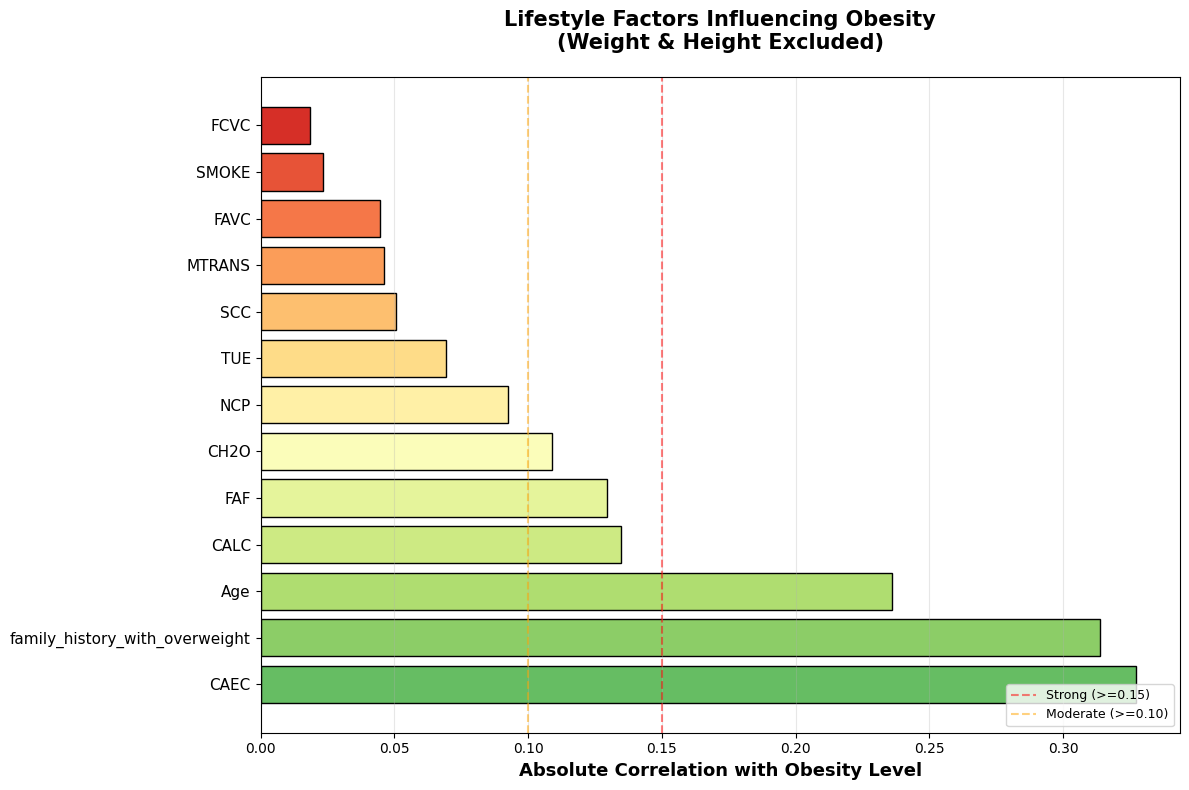

[Visualization 1] Factor Influence Ranking


In [13]:
# Visualization 1: Factor Ranking
plt.figure(figsize=(12, 8))
top_factors = correlation_with_target
colors = plt.cm.RdYlGn_r(np.linspace(0.2, 0.9, len(top_factors)))
plt.barh(range(len(top_factors)), top_factors.values, color=colors, edgecolor='black')
plt.yticks(range(len(top_factors)), top_factors.index, fontsize=11)
plt.xlabel('Absolute Correlation with Obesity Level', fontsize=13, fontweight='bold')
plt.title('Lifestyle Factors Influencing Obesity\n(Weight & Height Excluded)',
         fontsize=15, fontweight='bold', pad=20)
plt.grid(axis='x', alpha=0.3)
plt.axvline(x=0.15, color='red', linestyle='--', alpha=0.5, label='Strong (>=0.15)')
plt.axvline(x=0.10, color='orange', linestyle='--', alpha=0.5, label='Moderate (>=0.10)')
plt.legend(loc='lower right', fontsize=9)
plt.tight_layout()
plt.show()
print("[Visualization 1] Factor Influence Ranking")

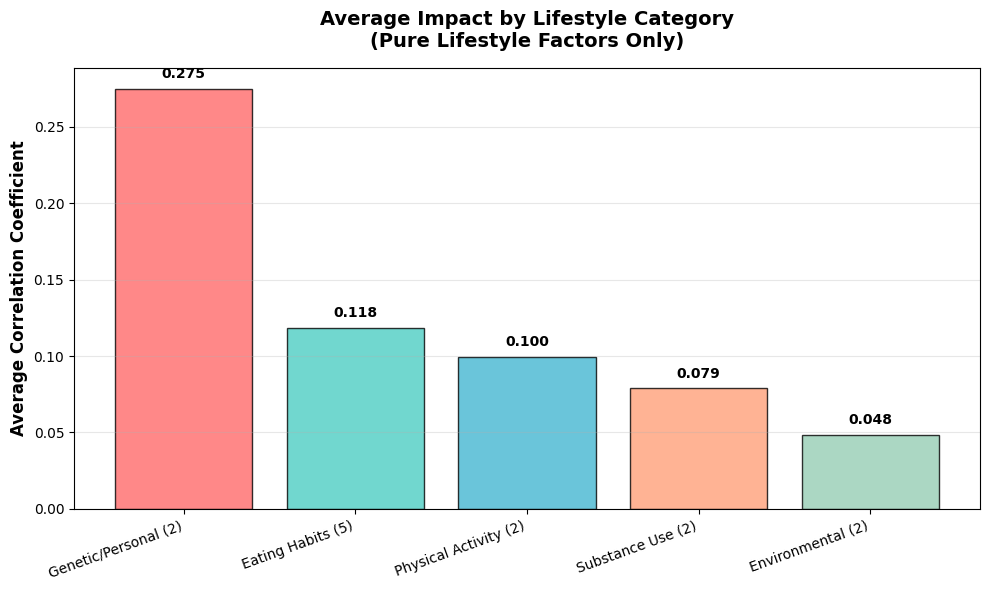

[Visualization 2] Category Impact


In [14]:
# Visualization 2: Category Impact
plt.figure(figsize=(10, 6))
categories = [item[0] for item in category_impacts_sorted]
impacts = [item[1] for item in category_impacts_sorted]
colors_cat = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#96CEB4']
plt.bar(range(len(categories)), impacts, color=colors_cat, edgecolor='black', alpha=0.8)
plt.xticks(range(len(categories)), categories, rotation=20, ha='right', fontsize=10)
plt.ylabel('Average Correlation Coefficient', fontsize=12, fontweight='bold')
plt.title('Average Impact by Lifestyle Category\n(Pure Lifestyle Factors Only)',
         fontsize=14, fontweight='bold', pad=15)
plt.grid(axis='y', alpha=0.3)

for i, (cat, imp) in enumerate(zip(categories, impacts)):
    plt.text(i, imp + 0.005, f'{imp:.3f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()
print("[Visualization 2] Category Impact")

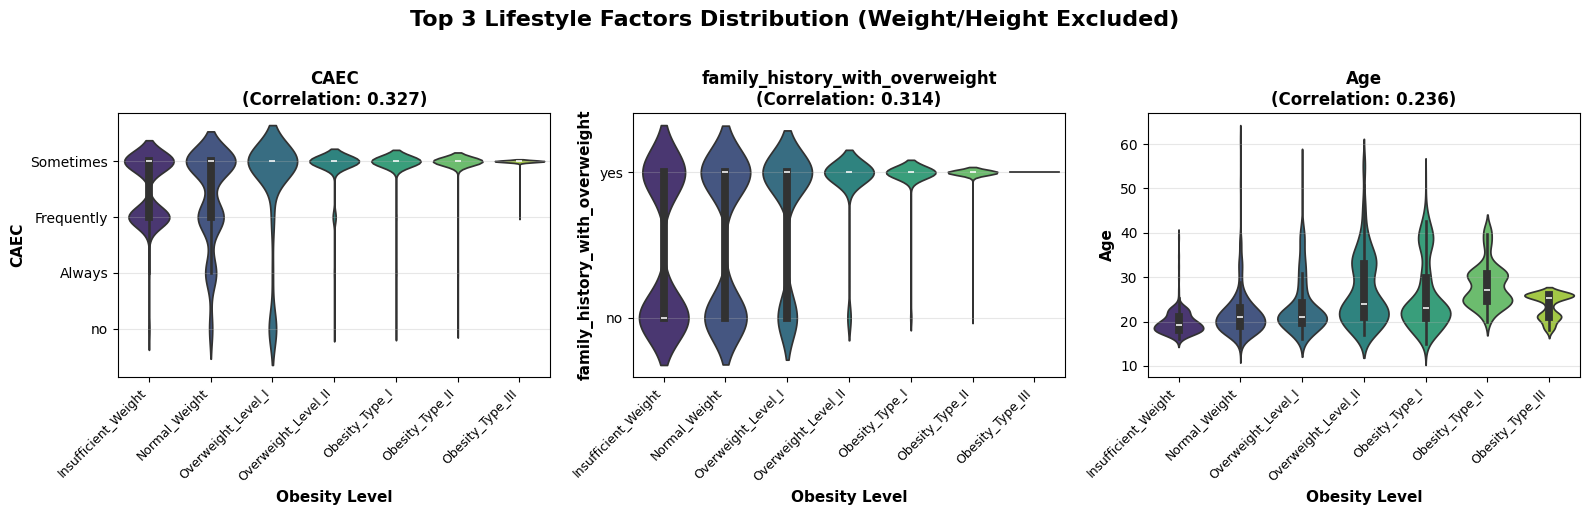

[Visualization 3] Top 3 Factors Distribution


In [15]:
# Visualization 3: Top 3 Factors Distribution
top_3_factors = correlation_with_target.head(3).index.tolist()

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for idx, factor in enumerate(top_3_factors):
    plot_data = pd.DataFrame({factor: df[factor], 'Obesity': y_labels})
    sns.violinplot(data=plot_data, x='Obesity', y=factor,
                  palette='viridis', order=obesity_order, ax=axes[idx])
    axes[idx].set_xticklabels(obesity_order, rotation=45, ha='right', fontsize=9)
    axes[idx].set_xlabel('Obesity Level', fontsize=11, fontweight='bold')
    axes[idx].set_ylabel(factor, fontsize=11, fontweight='bold')
    axes[idx].set_title(f'{factor}\n(Correlation: {correlation_with_target[factor]:.3f})',
                       fontsize=12, fontweight='bold')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Top 3 Lifestyle Factors Distribution (Weight/Height Excluded)',
            fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()
print("[Visualization 3] Top 3 Factors Distribution")

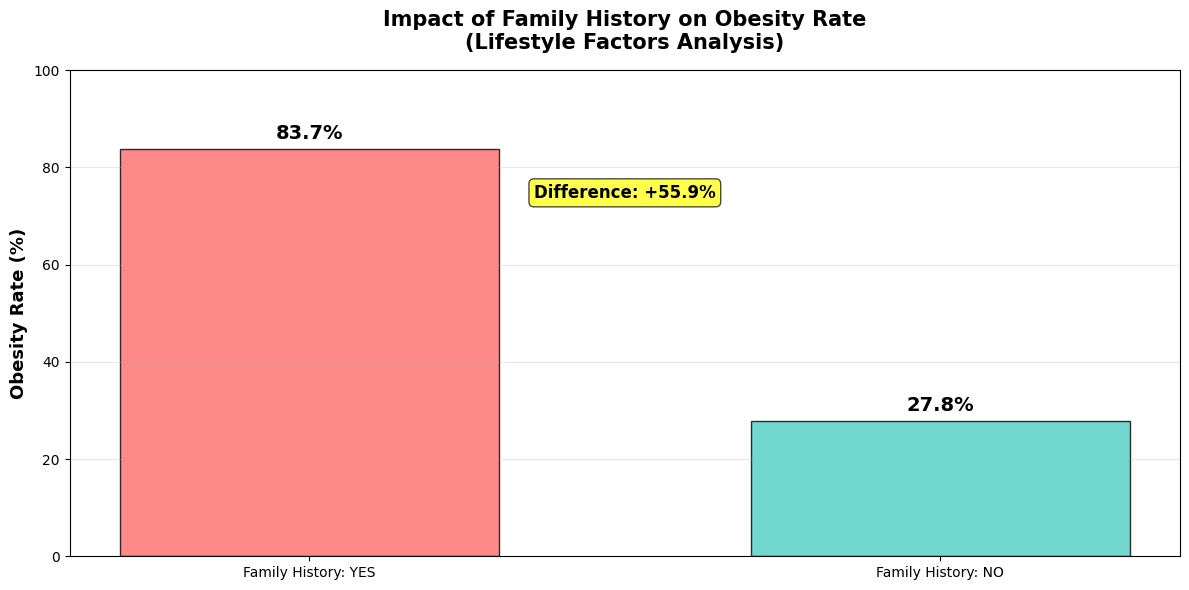

[Visualization 4] Family History Impact


In [16]:
# Visualization 4: Family History Impact
obesity_classes = ['Overweight_Level_I', 'Overweight_Level_II', 'Obesity_Type_I',
                   'Obesity_Type_II', 'Obesity_Type_III']

family_data = pd.DataFrame({
    'Family_History': le_dict['family_history_with_overweight'].inverse_transform(
        df_processed['family_history_with_overweight']),
    'Obesity': y_labels
})

family_yes = family_data[family_data['Family_History'] == 'yes']
family_no = family_data[family_data['Family_History'] == 'no']

obesity_rate_yes = (family_yes['Obesity'].isin(obesity_classes).sum() / len(family_yes)) * 100
obesity_rate_no = (family_no['Obesity'].isin(obesity_classes).sum() / len(family_no)) * 100

plt.figure(figsize=(12, 6))
categories_fh = ['Family History: YES', 'Family History: NO']
rates = [obesity_rate_yes, obesity_rate_no]
colors_fh = ['#FF6B6B', '#4ECDC4']

plt.bar(categories_fh, rates, color=colors_fh, edgecolor='black', width=0.6, alpha=0.8)
plt.ylabel('Obesity Rate (%)', fontsize=13, fontweight='bold')
plt.title('Impact of Family History on Obesity Rate\n(Lifestyle Factors Analysis)',
         fontsize=15, fontweight='bold', pad=15)
plt.ylim(0, 100)
plt.grid(axis='y', alpha=0.3)

for i, (cat, rate) in enumerate(zip(categories_fh, rates)):
    plt.text(i, rate + 2, f'{rate:.1f}%', ha='center', fontsize=14, fontweight='bold')

diff = obesity_rate_yes - obesity_rate_no
plt.text(0.5, max(rates) - 10, f'Difference: +{diff:.1f}%',
        ha='center', fontsize=12, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

plt.tight_layout()
plt.show()
print("[Visualization 4] Family History Impact")

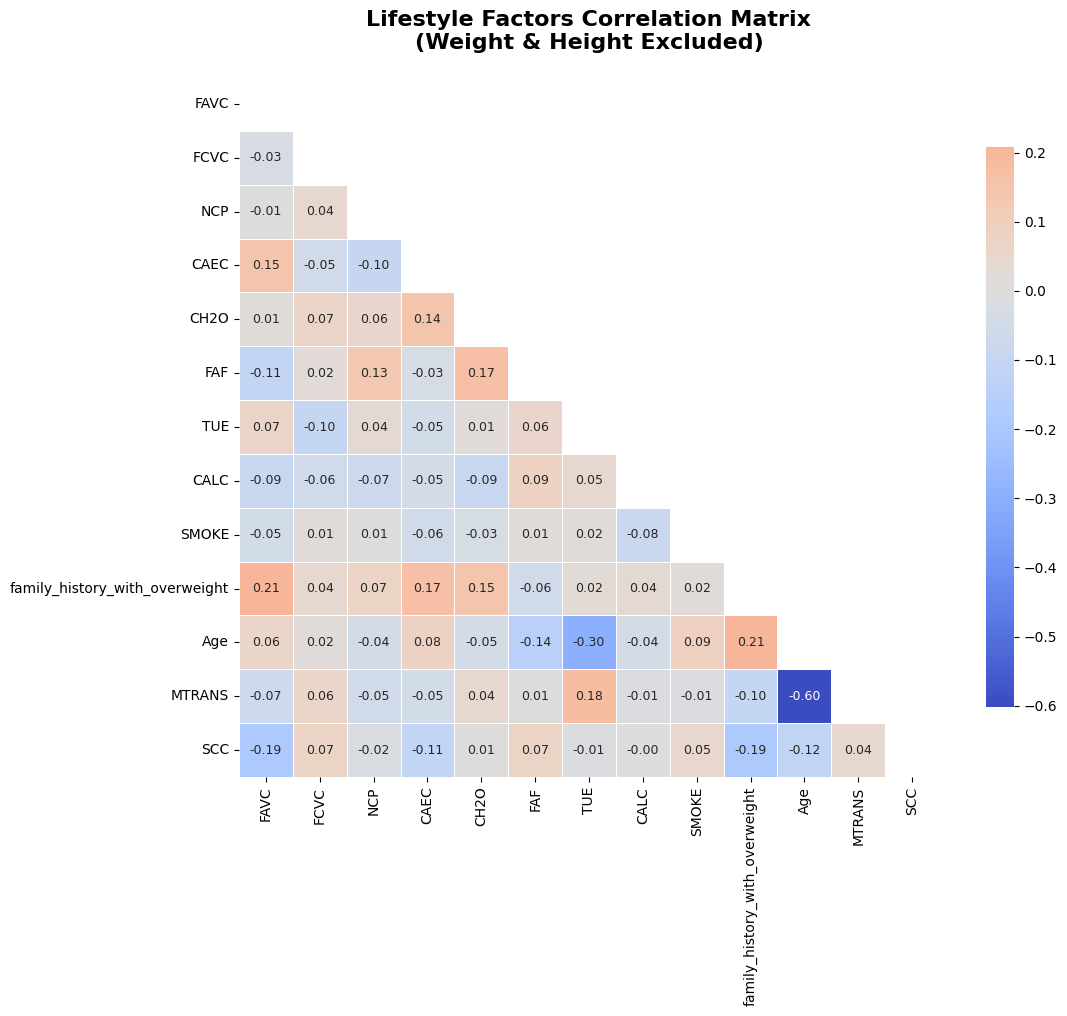

[Visualization 5] Correlation Heatmap


In [17]:
# Visualization 5: Correlation Heatmap
plt.figure(figsize=(12, 10))
lifestyle_corr = df_processed[lifestyle_features].corr()
mask = np.triu(np.ones_like(lifestyle_corr, dtype=bool))
sns.heatmap(lifestyle_corr, mask=mask, annot=True, fmt='.2f',
            cmap='coolwarm', center=0, square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8}, annot_kws={'size': 9})
plt.title('Lifestyle Factors Correlation Matrix\n(Weight & Height Excluded)',
         fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()
print("[Visualization 5] Correlation Heatmap")

## 8. Final Results

In [18]:
print("=" * 80)
print("Final Analysis Results (Lifestyle Factors Only)")
print("=" * 80)

print("\n[1] Top 5 Lifestyle Factors")
print("=" * 60)
for i, (feature, corr) in enumerate(correlation_with_target.head(5).items(), 1):
    print(f"{i}. {feature:35s} | Correlation: {corr:.3f}")

print("\n[2] Category Impact Ranking")
print("=" * 60)
for i, (category, impact) in enumerate(category_impacts_sorted, 1):
    print(f"{i}. {category:25s} | Average: {impact:.3f}")

print("\n[3] Key Findings")
print("=" * 60)
print("- Weight/Height excluded to prevent data leakage")
print(f"- CAEC (Snacking) is the top lifestyle factor (correlation: {correlation_with_target.iloc[0]:.3f})")
print(f"- Family history remains a strong predictor (correlation: {correlation_with_target['family_history_with_overweight']:.3f})")
print("- Exercise shows protective effects against obesity")
print("- Lifestyle factors alone can predict obesity")

print("\n[4] Data Leakage Prevention")
print("=" * 60)
print("Excluded: Weight, Height, Gender")
print("Model learns from lifestyle behaviors, not direct obesity indicators")
print("Practical implication: Lifestyle modification can prevent obesity")

print("\n[5] Dataset Summary")
print("=" * 60)
print(f"Total features: {X_final_df.shape[1] + 1} (including target)")
print(f"  - X (features): {X_final_df.shape[1]} columns")
print(f"  - y (target): 1 column")
print(f"  - Original: 13 lifestyle factors")
print(f"  - Derived: 16 engineered features")
print(f"  - Total samples: {len(y)}")

print("\n" + "=" * 80)
print("Analysis Complete!")
print("=" * 80)

Final Analysis Results (Lifestyle Factors Only)

[1] Top 5 Lifestyle Factors
1. CAEC                                | Correlation: 0.327
2. family_history_with_overweight      | Correlation: 0.314
3. Age                                 | Correlation: 0.236
4. CALC                                | Correlation: 0.135
5. FAF                                 | Correlation: 0.130

[2] Category Impact Ranking
1. Genetic/Personal (2)      | Average: 0.275
2. Eating Habits (5)         | Average: 0.118
3. Physical Activity (2)     | Average: 0.100
4. Substance Use (2)         | Average: 0.079
5. Environmental (2)         | Average: 0.048

[3] Key Findings
- Weight/Height excluded to prevent data leakage
- CAEC (Snacking) is the top lifestyle factor (correlation: 0.327)
- Family history remains a strong predictor (correlation: 0.314)
- Exercise shows protective effects against obesity
- Lifestyle factors alone can predict obesity

[4] Data Leakage Prevention
Excluded: Weight, Height, Gender
Model

## 9. Save Processed Data

In [19]:
# Save processed data
X_final_df.to_csv('X_lifestyle_29features.csv', index=False)
pd.Series(y).to_csv('y_obesity_target.csv', index=False)

print("Data saved successfully!")
print(f"  - X_lifestyle_29features.csv: {X_final_df.shape}")
print(f"  - y_obesity_target.csv: {y.shape}")
print(f"\nTotal columns: {X_final_df.shape[1]} + 1 = {X_final_df.shape[1] + 1}")

# Download files
from google.colab import files
files.download('X_lifestyle_29features.csv')
files.download('y_obesity_target.csv')

Data saved successfully!
  - X_lifestyle_29features.csv: (2111, 29)
  - y_obesity_target.csv: (2111,)

Total columns: 29 + 1 = 30


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Summary

### Completed Steps
1. Weight/Height excluded (data leakage prevention)
2. 13 lifestyle factors selected
3. 16 derived features created
4. **Total: 30 features (29 X + 1 y)**
5. Factor influence analysis
6. Statistical validation (ANOVA)
7. 5 visualizations created

### Key Results
- **Top factor**: CAEC (Snacking) - 0.327
- **2nd**: Family history - 0.314
- **3rd**: Age - 0.236

### Next Steps
- Stage 4: Random Forest modeling + XAI analysis
- n_estimators=128
- Expected accuracy: 70-85%

---

**Author**: Lee Ji-hyun  
**Date**: 2025-11-19  
**Version**: V2 (30 features total)

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving obesity_selected_30variables.csv to obesity_selected_30variables.csv


In [ ]:
import pandas as pd

df = pd.read_csv("obesity_selected_30variables.csv")
df.head()


,KNN_pred,LR_pred,DT_pred,FCVC,PCA3,PCA1,Age,CH2O,NCP,PCA2,...,MTRANS_Automobile,FAVC_yes,CAEC_Frequently,FAVC_no,SCC_no,CAEC_Always,CAEC_no,CALC_Frequently,SCC_yes,NObeyesdad_label
0,2,1,2,2.000000,0.102810,-5.356973,19.000000,3.000000,3.000000,0.589872,...,0,1,1,0,1,0,0,1,0,Overweight_Level_I
1,2,6,1,2.000000,-0.367841,-2.357921,22.000000,3.000000,3.000000,0.595390,...,0,0,0,1,1,0,0,0,0,Normal_Weight
2,6,5,1,3.000000,-0.060673,-6.326491,18.000000,2.000000,3.000000,1.766576,...,0,1,0,0,1,0,0,0,0,Normal_Weight
3,5,3,5,2.793561,0.879665,-4.823541,19.506389,2.429059,3.788602,1.454875,...,0,1,0,0,1,0,0,0,0,Overweight_Level_I
4,5,5,1,1.972545,0.043904,-7.247341,17.085250,1.711074,2.339614,-1.390339,...,0,1,0,0,0,0,0,0,1,Overweight_Level_I


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 종속 변수(비만도)
target = "NObeyesdad_label"


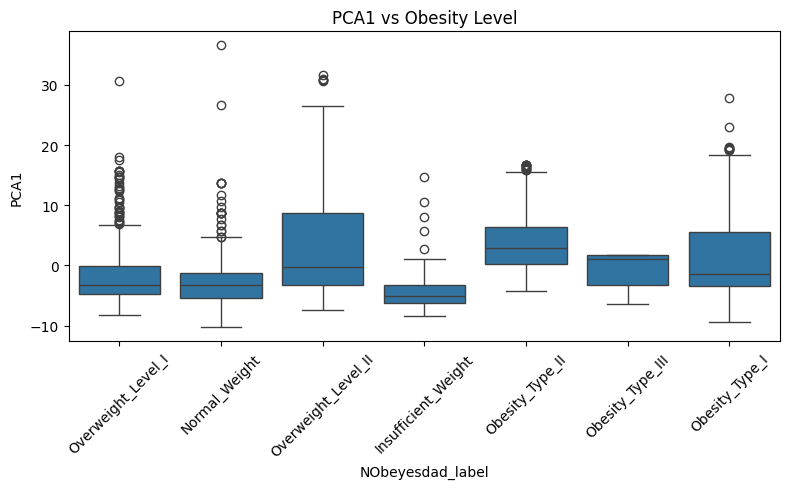

In [ ]:
#① PCA1 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA1"])
plt.title("PCA1 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

① PCA1 vs Obesity — Boxplot

그래프 설명

PCA1은 여러 생활습관 변수를 선형 결합한 “종합 행동 패턴 축”

boxplot은 비만도(NObeyesdad)의 각 등급과 PCA1의 분포 차이를 보여줌.

해석

비만도가 증가할수록 PCA1 값이 확연히 변화한다면,
PCA1이 비만도 구분에 의미 있는 축이라는 것을 의미함.

특히 비만(Obesity Type I~III) 구간에서 중앙값이 높거나 낮게 치우친다면
행동 패턴이 정상 체중과 체계적으로 다르다는 의미.

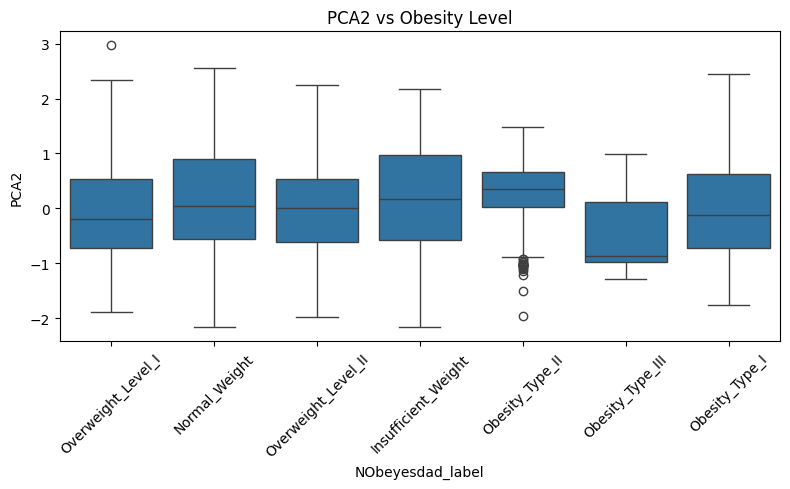

In [ ]:
#② PCA2 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA2"])
plt.title("PCA2 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

② PCA2 vs Obesity — Boxplot

그래프 설명

PCA2는 또 다른 생활습관 조합 축.

각 비만도 단계에서 PCA2 값 분포 차이를 비교.

해석

PCA2가 체중 부족, 정상, 과체중, 비만에서 뚜렷하게 구분된다면
두 번째 행동 패턴 축도 비만 분류에 기여하고 있음을 의미.

PCA1보다 분산이 작거나 차이가 적다면 설명력이 상대적으로 낮다는 의미.

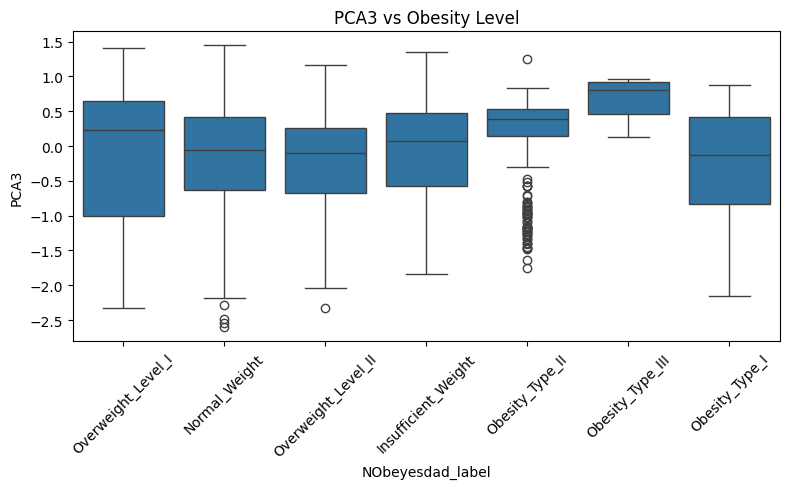

In [ ]:
#③ PCA3 vs 비만도 — Boxplot
plt.figure(figsize=(8,5))
sns.boxplot(x=df[target], y=df["PCA3"])
plt.title("PCA3 vs Obesity Level")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

③ PCA3 vs Obesity — Boxplot

그래프 설명

PCA3는 잔여 행동 요인을 설명하는 축.

해석

PCA3의 분포 변화가 미미하거나 비슷하다면
PCA3는 비만 수준을 구분하는 데 기여도가 낮은 축일 가능성이 높음.

반대로 특정 비만 단계에서 극단치가 많다면 특이 행동 패턴 존재 시사.

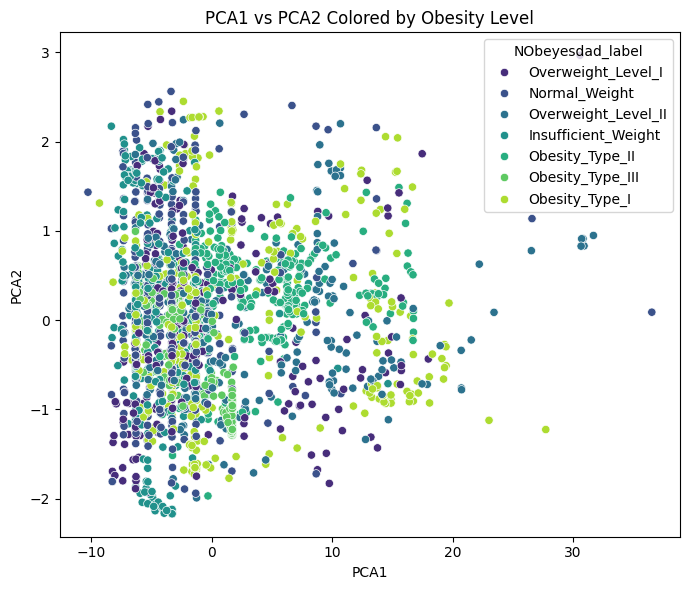

In [ ]:
#④ PCA1 vs PCA2 (색: 비만도) — Scatterplot
plt.figure(figsize=(7,6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue=target, palette="viridis")
plt.title("PCA1 vs PCA2 Colored by Obesity Level")
plt.tight_layout()
plt.show()

④ PCA1 vs PCA2 (색: Obesity) — Scatterplot

그래프 설명

x축: PCA1

y축: PCA2

색상: 비만도 단계

각 개인이 어떤 행동 패턴 공간에 위치하는지 군집 형태를 시각적으로 보여줌.

해석

정상 vs 비만이 서로 다른 영역에 모여 있다면
생활 패턴만으로도 비만도를 상당히 구분 가능함.

군집이 겹친다면 행동 패턴이 유사한 정상/비만 그룹이 존재함을 의미.

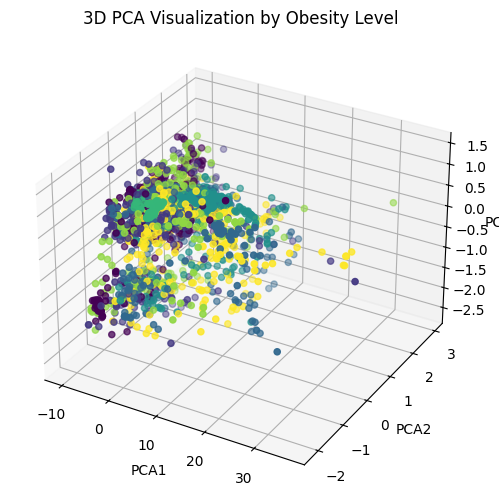

In [ ]:
#⑤ PCA1 · PCA2 · PCA3 — 3D Scatterplot
df["Obesity_num"] = df["NObeyesdad_label"].astype("category").cat.codes

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    df["PCA1"],
    df["PCA2"],
    df["PCA3"],
    c=df["Obesity_num"],
    cmap="viridis"
)

ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
ax.set_zlabel("PCA3")
plt.title("3D PCA Visualization by Obesity Level")
plt.show()



⑤ PCA1 · PCA2 · PCA3 — 3D Scatterplot

그래프 설명

3개의 PCA 축을 모두 사용하여 행동 패턴을 3차원 공간에 표현.

색은 비만도.

해석

3차원에서 뚜렷한 군집이 형성되면
PCA 기반 행동 패턴만으로 비만 레벨이 거의 분리된다는 의미.

군집이 혼합되면 PCA로 설명되지 않는 요인(유전, 신체 지표 등)이 존재함.